# Load and preprocess data

Here is [the link](https://drive.google.com/drive/folders/1CWT1sOLk5yEr-OK_Wttl3ZamGcBiAJDc?usp=sharing) to the data and final models weights.

In [3]:
import sys

# enter here your path to 'src' and 'model_weights' dirs
sys.path.append(r"/cv-task2/src")
sys.path.append(r"/cv-task2/model_weights")

In [4]:
from preprocess import collect_ims_by_classes, create_ims_and_labels_arrays, create_train_val_variables

# enter here your path to dir with the original classification data
data_path = r'/cv-course-data/Classification_data'

Collecting data by classes

In [5]:
training_data_path = data_path + r'/train'
class_to_ims = collect_ims_by_classes(training_data_path)

In [6]:
class_l = list(class_to_ims.keys())
n_classes = len(class_l)
class_id = {class_name: id_ for id_, class_name in enumerate(class_l)}

In [7]:
class_l

['forest', 'glacier', 'mountain', 'buildings', 'street', 'sea']

In [8]:
{class_name: len(ims) for class_name, ims in class_to_ims.items()}

{'buildings': 2191,
 'forest': 2271,
 'glacier': 2424,
 'mountain': 2512,
 'sea': 2274,
 'street': 2382}

Converting the train data into np.arrays (Reshaping images to one size (150, 150, 3), shuffling the dataset)

In [9]:
train_samples, train_labels = create_ims_and_labels_arrays(class_to_ims, class_id)

## Classical Features extraction

In [10]:
import numpy as np
from preprocess.extract_features import to_hog, to_color_hist

#### The simplest way: just flatten an original image to a 1-dimensional vector 

In [11]:
train_fl = np.reshape(train_samples, (train_samples.shape[0], -1))
train_fl.shape

(14054, 67500)

#### Image to Histogram of Oriented Gradients 

In [12]:
train_n = train_samples.shape[0]
train_hog = np.apply_along_axis(to_hog, 1, train_samples.reshape((train_n, -1)))
train_hog.shape

(14054, 8100)

#### Image to Color Histogram

In [13]:
train_ch = np.apply_along_axis(to_color_hist, 1, train_samples.reshape((train_n, -1)))
train_ch.shape

(14054, 192)

## Torch Variables

In [14]:
n_samples = train_samples.shape[0]
proportion_val = 0.2
n_val = int(n_samples * proportion_val)
n_train = n_samples - n_val

Converting np.arrays to torch Variables

In [15]:
# for original images
X_train, X_val, y_train, y_val = create_train_val_variables(train_samples, train_labels, n_train)
# for flatten images
X_fl_train, X_fl_val, y_fl_train, y_fl_val = create_train_val_variables(train_fl, train_labels, n_train)
# # for HOG images
X_hog_train, X_hog_val, y_hog_train, y_hog_val = create_train_val_variables(train_hog, train_labels, n_train)
# # for Color Histogram images
X_ch_train, X_ch_val, y_ch_train, y_ch_val = create_train_val_variables(train_ch, train_labels, n_train)

# Reshaping ((n_batches, n_channels, height, width) format is needed for torch cnn layers)
X_train = X_train.permute(0, 3, 1, 2)
X_val = X_val.permute(0, 3, 1, 2)

# Train models

#### Only for demonstration purposes. The final models saved in the `model_weights` dir (and used in "Evaluate" section)

## KNN

In [16]:
from define_model.knn import KNN

knn = KNN(k=10)
knn.train(train_samples, train_labels)

## LR with flatten images

In [17]:
from train.train import train

In [18]:
from define_model.linear_regression import LinearClassificationModel

In [19]:
lr = LinearClassificationModel(X_fl_train.shape[1], n_classes)

path_checkpoints="./tmp_models_weights/lr_flatten"

iter_l, epoch_l, loss_l, acc_train_l, acc_val_l = train(
    lr, X_fl_train, y_fl_train, X_fl_val, y_fl_val, 
    batch_size=64, num_epochs=1,
    save_checkpoints=True, regularity_checkpoints=1, path_checkpoints=path_checkpoints
)

EPOCH 0 / 0


Batches: 100%|██████████| 175/175 [00:00<00:00, 255.36it/s]


TRAIN       accuracy: 0.4001245108502312
VALIDATION  accuracy: 0.3701067615658363
Weights saved to ./tmp_models_weights/lr_flatten/Last model.pt.
Weights saved to ./tmp_models_weights/lr_flatten/Best model.pt.


Final TRAIN       accuracy: 0.4001245108502312
Final VALIDATION  accuracy: 0.3701067615658363


<Figure size 432x288 with 0 Axes>

## LR with HOG features

In [20]:
lr = LinearClassificationModel(X_hog_train.shape[1], n_classes)

path_checkpoints="./tmp_models_weights/lr_hog"

iter_l, epoch_l, loss_l, acc_train_l, acc_val_l = train(
    lr, X_hog_train, y_hog_train, X_hog_val, y_hog_val, 
    batch_size=64, num_epochs=1,
    save_checkpoints=True, regularity_checkpoints=1, path_checkpoints=path_checkpoints,
)

EPOCH 0 / 0


Batches: 100%|██████████| 175/175 [00:00<00:00, 1147.23it/s]


TRAIN       accuracy: 0.38029171113482746
VALIDATION  accuracy: 0.3601423487544484
Weights saved to ./tmp_models_weights/lr_hog/Last model.pt.
Weights saved to ./tmp_models_weights/lr_hog/Best model.pt.


Final TRAIN       accuracy: 0.38029171113482746
Final VALIDATION  accuracy: 0.3601423487544484


<Figure size 432x288 with 0 Axes>

## LR with Color Histogram features

In [21]:
lr = LinearClassificationModel(X_ch_train.shape[1], n_classes)

path_checkpoints="./tmp_models_weights/lr_ch"

iter_l, epoch_l, loss_l, acc_train_l, acc_val_l = train(
    lr, X_ch_train, y_ch_train, X_ch_val, y_ch_val, 
    batch_size=64, num_epochs=1,
    save_checkpoints=True, regularity_checkpoints=1, path_checkpoints=path_checkpoints,
)

EPOCH 0 / 0


Batches: 100%|██████████| 175/175 [00:00<00:00, 1936.29it/s]

TRAIN       accuracy: 0.19343649946638208
VALIDATION  accuracy: 0.17686832740213523


Weights saved to ./tmp_models_weights/lr_ch/Last model.pt.
Weights saved to ./tmp_models_weights/lr_ch/Best model.pt.


Final TRAIN       accuracy: 0.19343649946638208
Final VALIDATION  accuracy: 0.17686832740213523


<Figure size 432x288 with 0 Axes>

## SVM

In [22]:
from sklearn import svm

svc = svm.SVC(C=0.1, gamma=0.0001, kernel='poly', probability=True)
# svm training is extremely slow on large datasets, so I use a small one for the demo
svc.fit(X_fl_train[:100], y_fl_train[:100]); 

## CNN

In [23]:
from define_model.cnn import CNNClassificationModel
import torch

In [24]:
cnn = CNNClassificationModel()

cnn_path_checkpoints="./tmp_models_weights/cnn"

iter_l, epoch_l, loss_l, acc_train_l, acc_val_l = train(
    cnn, X_train[:1000], y_train[:1000], X_val[:200], y_val[:200], # smaller datasets for the demo
    batch_size=64, num_epochs=1,
    optimizer=torch.optim.Adam(cnn.parameters(), lr=0.001),
    save_checkpoints=True, regularity_checkpoints=1, path_checkpoints=cnn_path_checkpoints
)

EPOCH 0 / 0


Batches: 100%|██████████| 15/15 [01:46<00:00,  7.10s/it]


TRAIN       accuracy: 0.252
VALIDATION  accuracy: 0.275
Weights saved to ./tmp_models_weights/cnn/Last model.pt.
Weights saved to ./tmp_models_weights/cnn/Best model.pt.


Final TRAIN       accuracy: 0.252
Final VALIDATION  accuracy: 0.275


<Figure size 432x288 with 0 Axes>

### Restore Training CNN

In [26]:
cnn = CNNClassificationModel()
# let's assume we decided to change the lr during the training process
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.0001) 

previous_path_to_checkpoint = f"{cnn_path_checkpoints}/Best model.pt"
checkpoint = torch.load(previous_path_to_checkpoint)
cnn.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
last_epoch = checkpoint['epoch']
last_loss = checkpoint['loss']

path_checkpoints = ".\\tmp_models_weights\\cnn-resumed"
iter_l, epoch_l, loss_l, acc_train_l, acc_val_l = train(
    cnn, X_train[:1000], y_train[:1000], X_val[:200], y_val[:200], 
    batch_size=64, num_epochs=2, optimizer=optimizer,
    save_checkpoints=True, regularity_checkpoints=1, path_checkpoints=path_checkpoints,
    resume_training=True, last_epoch=last_epoch,
)

EPOCH 0 / 1


Batches: 100%|██████████| 15/15 [01:46<00:00,  7.08s/it]


TRAIN       accuracy: 0.267
VALIDATION  accuracy: 0.32
Weights saved to .\tmp_models_weights\cnn-resumed/Last model.pt.
Weights saved to .\tmp_models_weights\cnn-resumed/Best model.pt.


EPOCH 1 / 1


Batches: 100%|██████████| 15/15 [01:46<00:00,  7.10s/it]


TRAIN       accuracy: 0.395
VALIDATION  accuracy: 0.445
Weights saved to .\tmp_models_weights\cnn-resumed/Last model.pt.
Weights saved to .\tmp_models_weights\cnn-resumed/Best model.pt.


Final TRAIN       accuracy: 0.395
Final VALIDATION  accuracy: 0.445


<Figure size 432x288 with 0 Axes>

# Evaluate

## Load test data

The preprocessing is the same as for the train data

In [27]:
testing_data_path = data_path + r'/test'
test_class_to_ims = collect_ims_by_classes(testing_data_path)

test_samples, test_labels = create_ims_and_labels_arrays(test_class_to_ims, class_id)

In [28]:
test_n = test_samples.shape[0]

In [29]:
test_fl = np.reshape(test_samples, (test_n, -1))
test_hog = np.apply_along_axis(to_hog, 1, test_samples.reshape((test_n, -1)))
test_ch = np.apply_along_axis(to_color_hist, 1, test_samples.reshape((test_n, -1)))

In [30]:
from preprocess.preprocess import create_variables

X_test, y_test = create_variables(test_samples, test_labels)
X_test = X_test.permute(0, 3, 1, 2)

X_fl_test, y_fl_test = create_variables(test_fl, test_labels)
X_hog_test, y_hog_test = create_variables(test_hog, test_labels)
X_ch_test, y_ch_test = create_variables(test_ch, test_labels)

## KNN

In [32]:
knn.evaluate(test_samples[:500], test_labels[:500]) # too slow :(

Prediction: 100%|██████████| 500/500 [12:54<00:00,  1.55s/it]


0.282

## LR with flatten images

Weights are saved while training on GPU. Dont forget to remap the trained models to the CPU device if it's used

In [33]:
path_to_weights = r"/content/drive/MyDrive/cv-task2/models_weights" # Your path to the model_weights dir

In [34]:
lr_flatten = LinearClassificationModel(X_fl_test.shape[1], n_classes)

checkpoint = torch.load(path_to_weights + "/linear_regression/flatten/Best model.pt")
lr_flatten.load_state_dict(checkpoint['model_state_dict']);

In [35]:
from train.train import get_accuracy

get_accuracy(lr_flatten, X_fl_test, y_fl_test, batch_size=64)

0.49566666666666664

### LR interpretation

The first layer of NN is usually well interpreted. As linear regression is only able to learn one template for each class, it is basically very general. Let's look at the templates for each of the classes:

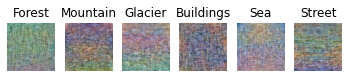

In [36]:
from visualize.visualize_linear_regression import visualize_linear_regression

visualize_linear_regression(lr_flatten, class_l=['forest', 'mountain', 'glacier', 'buildings', 'sea', 'street', ])

## LR with HOG features

In [37]:
lr_hog = LinearClassificationModel(X_hog_test.shape[1], n_classes)

checkpoint = torch.load(path_to_weights + "/linear_regression/hog/Best model.pt")
lr_hog.load_state_dict(checkpoint['model_state_dict']);

In [38]:
get_accuracy(lr_hog, X_hog_test, y_hog_test, batch_size=64)

0.6516666666666666

## LR with Color Histogram features

In [39]:
lr_ch = LinearClassificationModel(X_ch_test.shape[1], n_classes)

checkpoint = torch.load(path_to_weights + "/linear_regression/color_histogram/Best model.pt")
lr_ch.load_state_dict(checkpoint['model_state_dict']);

In [40]:
get_accuracy(lr_ch, X_ch_test, y_ch_test, batch_size=64)

0.4683333333333333

## SVM

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
import pickle

svc = pickle.load(open(path_to_weights + "/svm/Best model.pickle", "rb"))

In [43]:
y_fl_pred = svc.predict(X_fl_test)
accuracy_score(y_fl_pred[:500], y_fl_test[:500])

0.494

## CNN

In [44]:
# tmp
from define_model.cnn import CNNClassificationModel

In [45]:
cnn = CNNClassificationModel()

checkpoint = torch.load(path_to_weights + "/cnn/Best model.pt")
cnn.load_state_dict(checkpoint['model_state_dict']);

In [46]:
get_accuracy(cnn, X_test, y_test, batch_size=64)

0.7666666666666667

# Results

 Final accuracy score
- KNN
                                              test ~0.31
- Linear regression
        Features: Flatten images   val ~0.50  test ~0.49
        Features: HOG              val ~0.65  test ~0.65
        Features: Color Histogram  val ~0.50  test ~0.47
- SVM
        Features: Flatten images   val ~0.52  test ~0.53
- Convolutional NN
                                   val ~0.84  test ~0.77
